In [3]:
import sys
sys.path.append("../code")
import pandas as pd
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import blotto_utils as bu
from agent import Agent
import agent_utils as au

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
pd.options.display.max_colwidth = 10

# 538 Data

In [8]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data_dir = '/Users/Alex/Documents/Alex/Yale/Fall 2019/CPSC_490/blotto/data/'

fivethirtyeight_data_dir = data_dir + 'fivethirtyeight/'

data_files = sorted(glob(fivethirtyeight_data_dir + '*'))
train_list = []
test_list = []
for i in range(len(data_files)):
    print(i)
    temp_df = pd.read_csv(data_files[i])
    new_column_names = list(map((lambda x : '_'.join(x.split(' ')).lower()), list(temp_df.columns)))
    new_column_names[-1] = 'reason'

    temp_df.rename(dict(zip(list(temp_df.columns), new_column_names)), axis=1, inplace=True)

    temp_df['total_troops'] = temp_df['castle_1'] + \
                              temp_df['castle_2'] + \
                              temp_df['castle_3'] + \
                              temp_df['castle_4'] + \
                              temp_df['castle_5'] + \
                              temp_df['castle_6'] + \
                              temp_df['castle_7'] + \
                              temp_df['castle_8'] + \
                              temp_df['castle_9'] + \
                              temp_df['castle_10']

    full_strats_df = temp_df[temp_df.total_troops == 100].copy()
    full_strats_list = full_strats_df.to_dict('records')
    if i == 0:
        train_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]
    else:
        test_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]

0
1
2


In [9]:
len(train_list), len(test_list)

(1349, 2227)

In [10]:
pop_size = 100

# Initial Population

In [88]:
random.seed(0)
a_strat_init = random.sample(train_list, pop_size)
b_strat_init = random.sample(train_list, pop_size)
len(a_strat_init), len(b_strat_init)

(200, 200)

# Linear Programming Nash Equilibrium

In [89]:
probs_a, probs_b = bu.blotto_nash(a_strat_init, b_strat_init)

In [90]:
sum(probs_a), sum(probs_b)

(0.999999, 1.3749889999999998)

In [91]:
probs_a_norm = bu.normalize_probabilities(probs_a)
probs_b_norm = bu.normalize_probabilities(probs_b)

In [92]:
print(sum(probs_a_norm))
print(sum(probs_b_norm))

1.0000000000000002
0.9999999999999999


In [93]:
agent_a = Agent(a_strat_init, list(probs_a_norm))
agent_b = Agent(b_strat_init, list(probs_b_norm))

In [99]:
au.play_game(agent_a, agent_b, trials=1000) # b is the better agent on average

0.514

In [100]:
au.play_game(agent_a, train_list, trials=len(train_list))

0.6115641215715345

In [101]:
au.play_game(agent_b, train_list, trials=len(train_list))

0.5433654558932542

In [102]:
au.play_game(agent_a, test_list, trials=len(test_list))

0.5222272114952852

In [103]:
au.play_game(agent_b, test_list, trials=len(test_list))

0.48585541086663675

# Tester

## multiple of the same agent

In [28]:
samples = 50
random.seed(0)
results = {'a': [], 'b':[]}
for _ in range(samples):
    a_strat = random.sample(train_list, pop_size)
    b_strat = random.sample(train_list, pop_size)
    
    a, b = au.make_nash_agents(a_strat, b_strat)
    results['a'].append(au.play_game(a, train_list, trials=len(train_list)))
    results['b'].append(au.play_game(b, train_list, trials=len(train_list)))

In [20]:
import statistics as stat

In [27]:
print(stat.mean(results['a'][:10]), stat.mean(results['b'][:10]))

0.5921423276501112 0.5816901408450704


In [29]:
print(stat.mean(results['a']), stat.mean(results['b']))

0.5848628613787991 0.5691771682727946


## Training/Test Data

In [107]:
train_result = {'a':[], 'b':[], 'a_std':[], 'b_std':[]}
test_result = {'a':[], 'b':[], 'a_std':[], 'b_std':[]}
index = list(range(10, 502, 5))
for pop_size in index:

    # Initial Population

    random.seed(0)
    a_strat_init = random.sample(train_list, pop_size)
    b_strat_init = random.sample(train_list, pop_size)
    len(a_strat_init), len(b_strat_init)

    # Linear Programming Nash Equilibrium

    probs_a, probs_b = bu.blotto_nash(a_strat_init, b_strat_init)

#     sum(probs_a), sum(probs_b)

    probs_a_norm = bu.normalize_probabilities(probs_a)
    probs_b_norm = bu.normalize_probabilities(probs_b)

#     print(sum(probs_a_norm))
#     print(sum(probs_b_norm))

    agent_a = Agent(a_strat_init, list(probs_a_norm))
    agent_b = Agent(b_strat_init, list(probs_b_norm))
    # standard agent
    std_agent_a = Agent(a_strat_init)
    std_agent_b = Agent(b_strat_init)    

#     print(au.play_game(agent_a, agent_b, trials=1000)) # b is the better agent on average
    train_result['a'].append(au.play_game(agent_a, train_list, trials=len(train_list)))
    train_result['b'].append(au.play_game(agent_b, train_list, trials=len(train_list)))
    train_result['a_std'].append(au.play_game(std_agent_a, train_list, trials=len(train_list)))
    train_result['b_std'].append(au.play_game(std_agent_b, train_list, trials=len(train_list)))
    test_result['a'].append(au.play_game(agent_a, test_list, trials=len(test_list)))
    test_result['b'].append(au.play_game(agent_b, test_list, trials=len(test_list)))
    test_result['a_std'].append(au.play_game(std_agent_a, test_list, trials=len(test_list)))
    test_result['b_std'].append(au.play_game(std_agent_b, test_list, trials=len(test_list)))

/Users/Alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.06157e-36): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


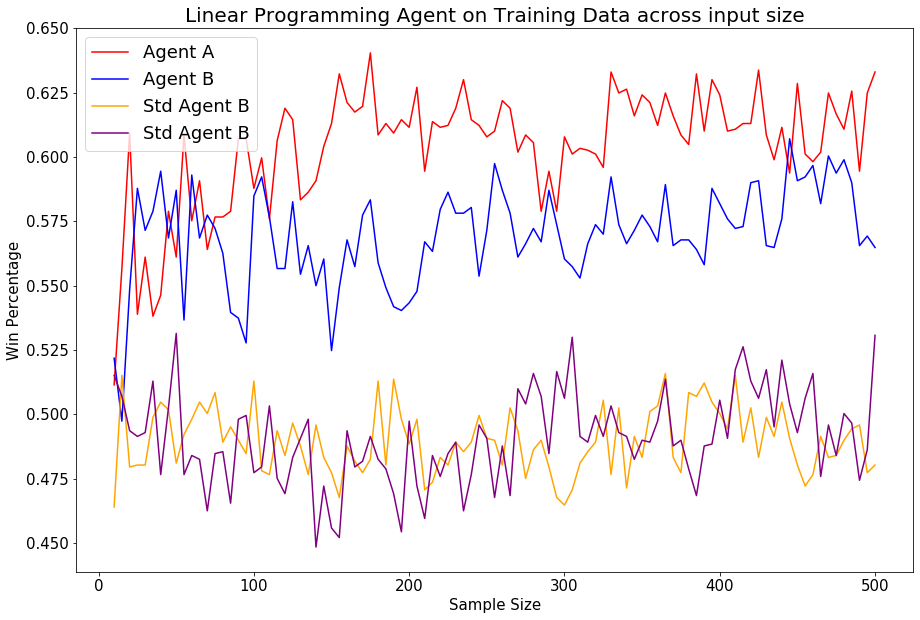

In [110]:
plt.figure(figsize=(15, 10))
plt.plot(index, train_result['a'], label='Agent A', color='r')
plt.plot(index, train_result['b'], label='Agent B', color='b')
plt.plot(index, train_result['a_std'], label='Std Agent B', color='orange')
plt.plot(index, train_result['b_std'], label='Std Agent B', color='purple')
plt.title("Linear Programming Agent on Training Data across input size", fontsize=20)
plt.xlabel("Sample Size", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size':18})
# plt.show()
plt.savefig("../figures/lin-prog-std-training-data-result.jpg")

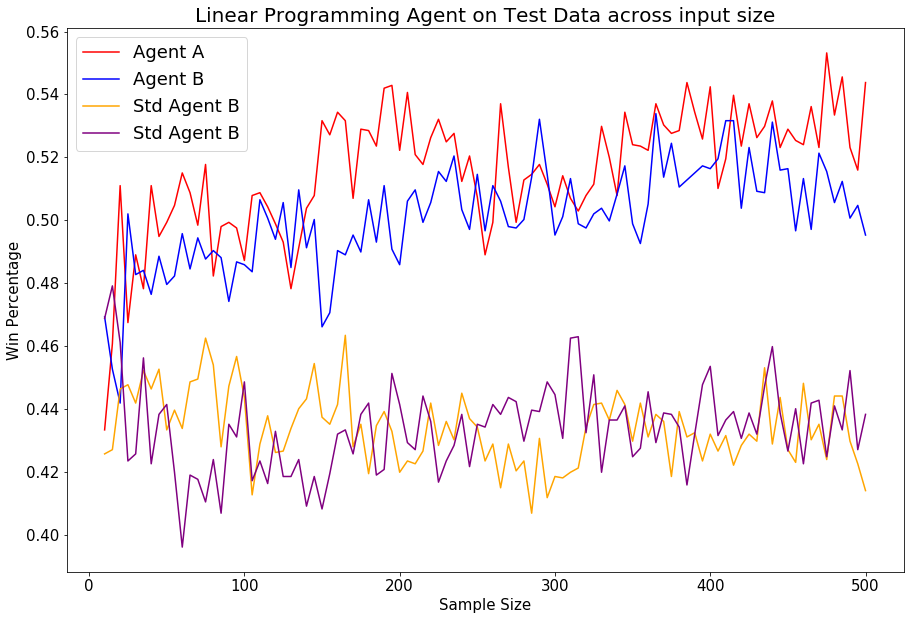

In [111]:
plt.figure(figsize=(15, 10))
plt.plot(index, test_result['a'], label='Agent A', color='r')
plt.plot(index, test_result['b'], label='Agent B', color='b')
plt.plot(index, test_result['a_std'], label='Std Agent B', color='orange')
plt.plot(index, test_result['b_std'], label='Std Agent B', color='purple')
plt.title("Linear Programming Agent on Test Data across input size", fontsize=20)
plt.xlabel("Sample Size", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size':18})
# plt.show()
plt.savefig("../figures/lin-prog-std-test-data-result.jpg")